In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt



In [5]:
student_id = 31105327 # Add in your student ID
student_name = "Omar Afifi" # Add in your student name

# Task 1: Implement a function to perform convolution

In [6]:


def conv(im, A):
    ## im is the image that we are convolving
    ## A is the convolution kernel
    ## B is the output of the convolution
    if(len(A.shape) != len(im.shape)):
        raise ValueError('the number of dimensions of the kernel and image have to match')
    
    im_height = im.shape[0]
    im_width = im.shape[1]
    A_height,A_width = A.shape
    B_height,B_width = im_height-A_height+1,im_width-A_width+1 ##Asuming zero padding and 1 stride
    B = np.zeros((B_height,B_width))

    for y in range(B_height):
        for x in range(B_width):
            B[y,x] = np.sum(np.multiply(A,im[y:y+A_height,x:x+A_width]),axis=None)
            
    return B

# Explain your code here:

# We first declare the shapes of the input image and kernel, as well as the putput image, which will help with calculations

# We itialize our output image as a zeros array with the corresponding calculated output image shape

# We iterate through each element of the output image, and assign it to the corresponding value of the result of the convolution, which would
# the total sum the elemnt-wise multiplaction of the kernel, and a same-size window on the original image

# In case our input image is not grey-scale, np.newaxis takes care of that by stretching our kernel to match the number of channels, to esnure
# that all channles get convoluted with the same kernel





In [8]:
k = np.array([[-1,1,2,2],[-1,1,1,2],[-1,-1,-1,2],[-1,-1,-1,2]])

i = np.array([[1,3,-1,5,6,5],
     [1,3,-1,5,6,5],
     [1,3,-1,5,6,5],
     [1,3,-1,5,6,5],
     [1,3,-1,5,6,5],
     [1,3,-1,5,6,5],
     [1,3,-1,5,6,5]])

conv(i, k)

array([[35., 41., 50.],
       [35., 41., 50.],
       [35., 41., 50.],
       [35., 41., 50.]])

Text(0.5, 1.0, 'original image')

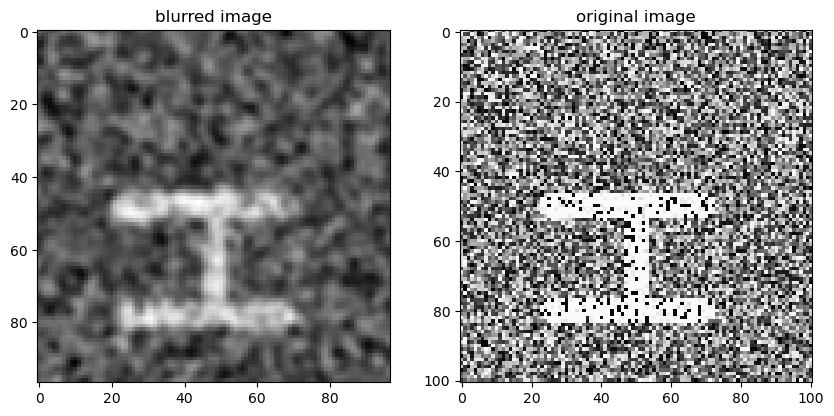

In [20]:
# Show results here

import cv2
img = cv2.imread("task6_helipad.png",cv2.IMREAD_GRAYSCALE)
kernel = np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]])/159

filt_img = conv(img,kernel)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(filt_img,'gray')
plt.title('blurred image')

plt.subplot(1,2,2)
plt.imshow(img,'gray')
plt.title('original image')


# Task 2: Calculate the image gradients


Text(0.5, 1.0, 'Vertical gradient (horizontal edges)')

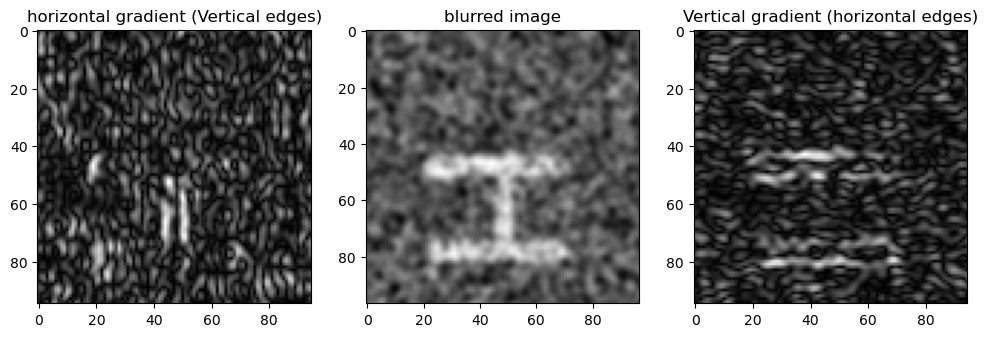

In [21]:
# Write your code here
Gx = np.array([[1, 0, -1],[2, 0, -2],[1,0,-1]])
Gy = np.transpose(Gx)

horz_grad = conv(filt_img,Gx)
vert_grad = conv(filt_img,Gy)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(abs(horz_grad),'gray')
plt.title('horizontal gradient (Vertical edges)')

plt.subplot(1,3,2)
plt.imshow(filt_img,'gray')
plt.title('blurred image')

plt.subplot(1,3,3)
plt.imshow(abs(vert_grad),'gray')
plt.title('Vertical gradient (horizontal edges)')



In [22]:
# Demonstrate your understanding by answering the question below:
# Looking at the filter coefficients, explain how a sobel filter picks out horizontal edges?
# 
# A horizontal sobel filter looks at the vertical gradient at each pixel. At each pixel, by convolving the image window with the sobel horizontal 
# filter, we are essentially taking the difference between the top and bottom pixels, while making the pixels directly above and directly below the
# pixel in question more signficant, hence the opposite sign coefficents at the top and bottom and the larger coefficents at the centre. 
# And the value of the pixel in question will be indicative of the difference between the row of pixels immediately above it and the row of pixels immediately 
# below it. So if the pixels on top and the pixels on the bottom have very different values, then the pixel at the centre of the sobel filter will
# have a large value, since there is a big difference between the top and bottom pixels. If the top pixels and bottom pixels have similar values,
# then the pixel at the centre of the soble filter will give a small value, since there is a small to little difference between the top and 
# bottom pixels

# I it also important to mention that when displaying an image of the gradients, it might be more useful to use absolute values of the image 
# pixels, rather than the raw pixel values. This is because that when we covolve with the soble filter, we get both positive and negative values,
# depending on the direction of change. Negative value pixels get displayed with less intensity compared to 0 value pixels, and so we will end
# Seeing edges in one direction only. Since we are interested in seeing all horizontal and vertical edges, regardless of the direction of change
# for each edge, normalizing pixel values before diplaying would be helpful
# 

# Task 3: Calculate gradient magnitude

In [23]:
# Write your code here
grad = np.sqrt(horz_grad**2 + vert_grad**2)

Text(0.5, 1.0, 'Vertical gradient (horizontal edges)')

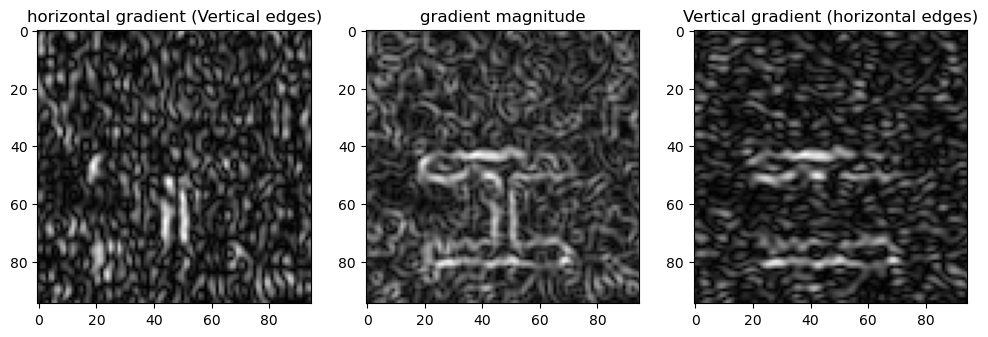

In [24]:
# Show results here
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(abs(horz_grad),'gray')
plt.title('horizontal gradient (Vertical edges)')

plt.subplot(1,3,2)
plt.imshow(grad,'gray')
plt.title('gradient magnitude')

plt.subplot(1,3,3)
plt.imshow(abs(vert_grad),'gray')
plt.title('Vertical gradient (horizontal edges)')





In [25]:
# Demonstrate your understanding by answering the question below:
# What differences in gradient magnitude would be observed for a corner, edge and solid region?

# A Corner would have a large change in pixel intensity in both the horizontal and vertical directions, which would result in a big gradient
# magnitude.
# An edge would have a large change in pixel intensity in only one direction, which would still result in a large gradient magnitude, but not as
# large as a corner
# A solid region wouldn't have a large change in pixel intensity, therefore woudl result in a small gradient magnitude

# Task 4: Calculate gradient orientation

In [26]:
# Write your code here
epsilon = 1e-8
theta = np.round(np.arctan(vert_grad/(horz_grad+epsilon))/(45/180*np.pi))
theta = abs(theta)

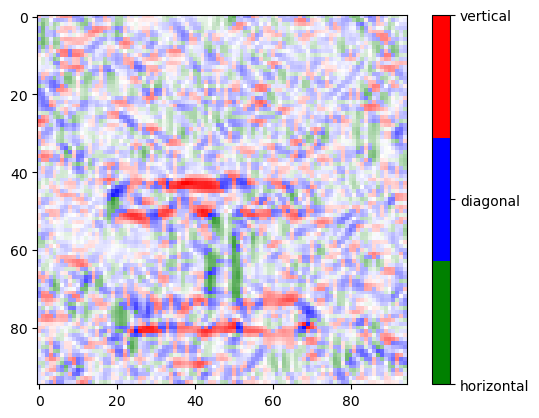

In [38]:
# Show results here
#Showing horizontal, vertical and diagonal directions only
colors = ['green','blue','red']
direction_names = ['horizontal', 'diagonal', 'vertical']
cmap = plt.cm.colors.ListedColormap(colors)
inv_grad = grad*-1
plt.imshow(theta, cmap=cmap, alpha = (grad-grad.min())/(grad.max()-grad.min()), interpolation='nearest') 
# I added the alpha part so that the intensity of the different colors correlate with the gradient value, not just the direction. this is so
# that pixels with low gradient are colorless since they are irrelevant to us
cbar = plt.colorbar(orientation='vertical', ticks=np.arange(len(direction_names)))
cbar.ax.set_yticklabels(direction_names)
plt.show()

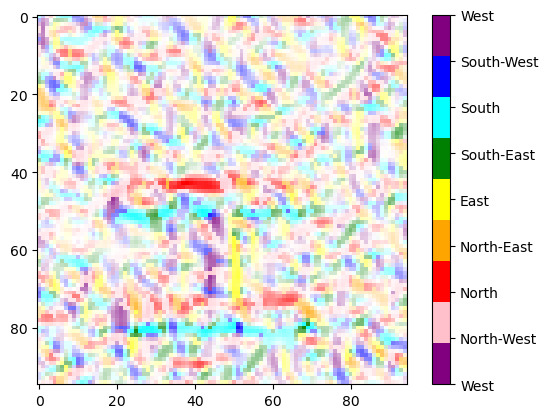

In [39]:
#Shoiwng all compass directions
theta2 = np.round(np.arctan2(vert_grad,(horz_grad))/(45/180*np.pi))

# Show results here
colors = ['purple','pink','red','orange','yellow','green','cyan','blue','purple']
         #  W        NW     N      NE       E        SE     S       SW     W
direction_names = ['West', 'North-West', 'North','North-East','East','South-East','South','South-West','West']
cmap = plt.cm.colors.ListedColormap(colors)
inv_grad = grad*-1
plt.imshow(theta2+4, cmap=cmap, alpha = (grad-grad.min())/(grad.max()-grad.min()), interpolation='nearest') 
cbar = plt.colorbar(orientation='vertical', ticks=np.arange(len(direction_names)))
cbar.ax.set_yticklabels(direction_names)
plt.show()

In [29]:
# Demonstrate your understanding by answering the question below:
# How could the gradient orientation be used to obtain rotational invariance for patch matching?

# The gradient orientation gives us inforamtion about how the certain patches in the image is oriented. So when we have two images of an object with diffrent
# orientation, we know that the gradients of the object in both images should be the same, since the objects would still have the same edges and corners.
# The only difference would be the orientation. Therefore once we obtain the orientation of the gradeints for both images, we would keep that in
# mind when doing patch matching, by rotating both patches in such a way that ensures the dominant gradients in both patches are pointing in the
# same direction. This allows us to do patch matching with rotated images, but it has the tradeoff of potential mismatches, for example corners
# of a squar being mismatched to different corners after rotation

# Task 5: Extend your code to perform non-maximal suppression

In [30]:
def non_maximal_suppression(gradients,directions):
    # directions is an array of mulatiples of 45 degrees
    if gradients.shape != directions.shape:
        raise ValueError('gradients values and directions arrays must have the same size')
    grad_shape = gradients.shape
    suppressed_grad = np.zeros(grad_shape)

    for y in range(1,grad_shape[0]-1): #Skipping checking the first and last rows and columns to avoid out of bounds errors
        for x in range(1,grad_shape[1]-1):
            direction = directions[y,x]
            #Since my version of python is 3.7 I can't use the switch case statement
            if direction == 0 or direction == 4 or direction == -4:
                suppressed_grad[y,x] = gradients[y,x] > gradients[y,x+1] and gradients[y,x] > gradients[y,x-1]
            elif direction == 1 or direction == -3:
                suppressed_grad[y,x] = gradients[y,x] > gradients[y+1,x+1] and gradients[y,x] > gradients[y-1,x-1]
            elif direction == 2 or direction == -2:
                suppressed_grad[y,x] = gradients[y,x] > gradients[y+1,x] and gradients[y,x] > gradients[y-1,x]
            elif direction == 3 or direction == -1:
                suppressed_grad[y,x] = gradients[y,x] > gradients[y-1,x+1] and gradients[y,x] > gradients[y+1,x-1]
            else:
                raise ValueError('some direction values are invalid')
    return suppressed_grad
            


In [36]:
# Write your code here
threshold = 150/255
normal_grad = (grad-grad.min())/(grad.max()-grad.min())
threshold_grad = normal_grad>threshold
threshold_grad =  threshold_grad*normal_grad
suppressed_grad = non_maximal_suppression(threshold_grad,theta2)

Text(0.5, 1.0, 'suppressd and thresholded image')

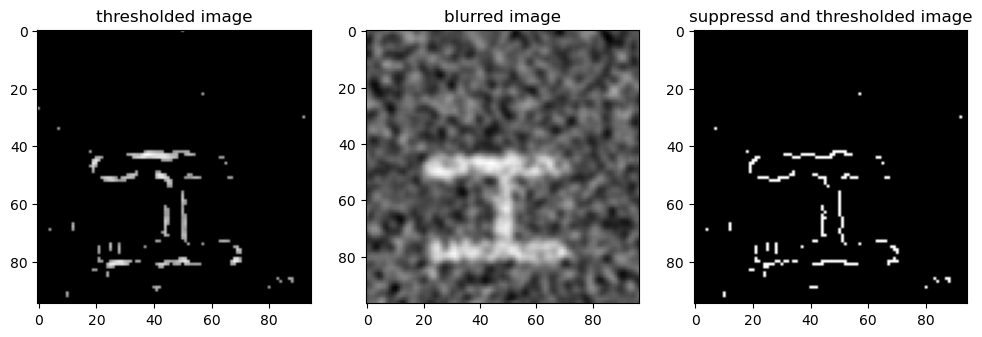

In [32]:
# Show results here
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(abs(threshold_grad),'gray')
plt.title('thresholded image')

plt.subplot(1,3,2)
plt.imshow(filt_img,'gray')
plt.title('blurred image')

plt.subplot(1,3,3)
plt.imshow(abs(suppressed_grad),'gray')
plt.title('suppressd and thresholded image')


In [33]:
# Demonstrate your understanding by answering the question below:
# Explain how you chose the threshold for non-maximal suppression?
# 
# By starting the threshold at the middle pixel intensity value, and by using trial and error to try to minimize the outlier pixels that do not
# belong to the H, while at the same time try to have as many pixels that belong on the H to stay high (1)


# Task 6: Find the helipad

In [34]:
# Write your code here
edges = np.argwhere((suppressed_grad) == 1)
center = np.median(edges, axis=0)
center = tuple(center.astype(int))
print("Estimated center:", center)


Estimated center: (67, 44)


Text(0.5, 1.0, 'Blurred image with estimated helipad center')

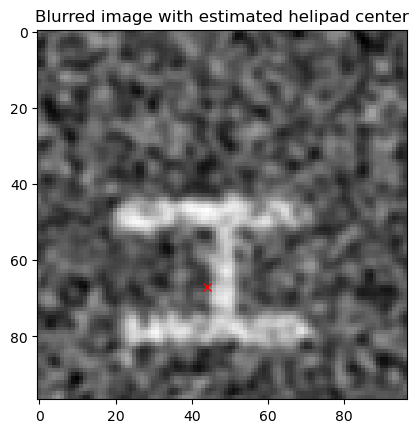

In [35]:
# Show results here

plt.imshow(filt_img,'gray')
plt.plot(center[1],center[0],'rx')
plt.title('Blurred image with estimated helipad center')


In [30]:
# Demonstrate your understanding by answering the question below:
# How did you adapt your previous code to solve this problem? 
# Firsly by using our conv function, we blur the image to mitigate the thermal noise that is present in the original image
# After that we use sobel filters to find the vertical and horizontal edges, and we find the gradient magnitude
# We pick a threshold value that minimizes outlier pixels and maximises pixels that lie within the H of the Helipad
# We do non Maximum suppression so that we only get the true edges of the H letter
# Finally, since the H letter is symmetrical both horizontally and vertically, then taking the average of the 1s positions to estimate the center seems
# logical. And since there are outliers (pixels valued 1 that are not part of the H letter), then using the median instead of the mean of the
# pixel positions mitigates the effect of the outliers 



# Do not remove or edit the following code snippet. 

When submitting your lab, please ensure that you have run the entire notebook from top to bottom. You can do this by clicking "Kernel" and "Restart Kernel and Run All Cells". Make sure the last cell (below) has also been run. 

In [31]:
file_name = str(student_id) + '_Lab1_Submission'
cmd = "jupyter nbconvert --to script Lab1_student_template.ipynb --output " + file_name
if(os.system(cmd)):
    print("Error converting to .py")
    print("cmd")

Error converting to .py
cmd
